In [200]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import random as rd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()
x = iris.data
y = iris.target
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [201]:
df_original = pd.DataFrame(x)
df_2feature = df_original.iloc[: , :-2]
df_2feature[2]  = y
print(df_2feature,df_2feature[2].value_counts())

       0    1  2
0    5.1  3.5  0
1    4.9  3.0  0
2    4.7  3.2  0
3    4.6  3.1  0
4    5.0  3.6  0
..   ...  ... ..
145  6.7  3.0  2
146  6.3  2.5  2
147  6.5  3.0  2
148  6.2  3.4  2
149  5.9  3.0  2

[150 rows x 3 columns] 0    50
1    50
2    50
Name: 2, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [202]:
#df_2feature = df_2feature.iloc[:-50,:]
df_2feature.columns = ['x1','x2','y']
df_2feature.loc[df_2feature.y==2,'y']=1
print(df_2feature['y'].value_counts(),df_2feature)

1    100
0     50
Name: y, dtype: int64       x1   x2  y
0    5.1  3.5  0
1    4.9  3.0  0
2    4.7  3.2  0
3    4.6  3.1  0
4    5.0  3.6  0
..   ...  ... ..
145  6.7  3.0  1
146  6.3  2.5  1
147  6.5  3.0  1
148  6.2  3.4  1
149  5.9  3.0  1

[150 rows x 3 columns]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [203]:
subset = df_2feature.sample(frac=0.2,replace=False,random_state=43)
df_2feature = df_2feature.append(subset)
print(df_2feature.info())
df_2feature = df_2feature.drop_duplicates(subset=['x1','x2','y'],keep=False)
print(df_2feature.info(),subset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      180 non-null    float64
 1   x2      180 non-null    float64
 2   y       180 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.6 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 3 to 148
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      71 non-null     float64
 1   x2      71 non-null     float64
 2   y       71 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 30 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      30 non-null     float64
 1   x2      30 non-null     float64
 2   y       30 non-null     int64  
dtypes: float64(2), int64(1)
me

In [204]:
subsample_x = subset.iloc[:,:-1].values
subsample_y = subset.iloc[:,-1].values

In [205]:
#clf_subsample = SVC(kernel='linear',C=1,gamma='auto')
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
#min_max_scaler = MinMaxScaler()
#subsample_x = min_max_scaler.fit_transform(subsample_x)
#subsample_x = preprocessing.scale(subsample_x)
print(subsample_x)
clf_subsample = LinearRegression()
clf_subsample.fit(subsample_x, subsample_y)
importance = clf_subsample.coef_

acc = 0

for i,v in enumerate(importance):
    print(i,v)
    acc += abs(v)

for i,v in enumerate(importance):
   print(abs(v)/acc)

[[4.8 3.1]
 [5.1 3.5]
 [6.  3. ]
 [5.8 2.7]
 [7.6 3. ]
 [5.1 3.4]
 [5.7 2.5]
 [6.1 2.8]
 [5.5 2.4]
 [4.9 2.4]
 [4.4 3. ]
 [6.8 2.8]
 [7.7 2.8]
 [4.8 3.4]
 [6.  2.9]
 [6.2 2.9]
 [5.7 4.4]
 [4.8 3. ]
 [5.8 2.8]
 [6.3 3.3]
 [4.9 3.6]
 [4.8 3. ]
 [4.9 3. ]
 [6.1 2.6]
 [6.2 2.8]
 [7.7 2.6]
 [5.1 3.5]
 [5.6 3. ]
 [4.7 3.2]
 [5.4 3.7]]
0 0.3166287926250703
1 -0.6168170867712136
0.33920423199023964
0.6607957680097605


In [206]:
df_original = pd.DataFrame(x)
df_2feature = df_original.iloc[: , :-2]
df_2feature[2]  = y
print(df_2feature,df_2feature[2].value_counts())

       0    1  2
0    5.1  3.5  0
1    4.9  3.0  0
2    4.7  3.2  0
3    4.6  3.1  0
4    5.0  3.6  0
..   ...  ... ..
145  6.7  3.0  2
146  6.3  2.5  2
147  6.5  3.0  2
148  6.2  3.4  2
149  5.9  3.0  2

[150 rows x 3 columns] 0    50
1    50
2    50
Name: 2, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [207]:
#df_2feature = df_2feature.iloc[:-50,:]
df_2feature.columns = ['x1','x2','y']
df_2feature.loc[df_2feature.y==2,'y']=1
print(df_2feature['y'].value_counts(),df_2feature)

1    100
0     50
Name: y, dtype: int64       x1   x2  y
0    5.1  3.5  0
1    4.9  3.0  0
2    4.7  3.2  0
3    4.6  3.1  0
4    5.0  3.6  0
..   ...  ... ..
145  6.7  3.0  1
146  6.3  2.5  1
147  6.5  3.0  1
148  6.2  3.4  1
149  5.9  3.0  1

[150 rows x 3 columns]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [208]:
subset = df_2feature.sample(frac=0.2,replace=False,random_state=43)
df_2feature = df_2feature.append(subset)
print(df_2feature.info())
df_2feature = df_2feature.drop_duplicates(subset=['x1','x2','y'],keep=False)
print(df_2feature.info(),subset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      180 non-null    float64
 1   x2      180 non-null    float64
 2   y       180 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.6 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 3 to 148
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      71 non-null     float64
 1   x2      71 non-null     float64
 2   y       71 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 30 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      30 non-null     float64
 1   x2      30 non-null     float64
 2   y       30 non-null     int64  
dtypes: float64(2), int64(1)
me

In [209]:
error_a = []
error_b = []
for i in range(21) :
    error_a.append(i)
    error_b.append(20-i)

print(error_b,error_a)

[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [210]:
pd.set_option('display.max_rows',10)

for i in range(21) :
    
    temp = df_2feature.copy()
    df_2feature_be = pd.DataFrame.to_numpy(df_2feature)
    #print(df_2feature_be.shape)
    e1 = temp['x1'].mean()*0.2*(error_a[i]/(error_a[i]+error_b[i]))
    e2 = temp['x2'].mean()*0.2*(error_b[i]/(error_a[i]+error_b[i]))

    for idx,cell in temp['x1'].iteritems():
        temp['x1'][idx] += e1
    temp = temp.to_numpy()
    df_2feature_be = np.vstack((df_2feature_be,temp))
    #print(df_2feature_be.shape)
    temp = df_2feature.copy()

    for idx,cell in temp['x1'].iteritems():
        temp['x1'][idx] = temp['x1'][idx] - e1
    temp = temp.to_numpy()
    df_2feature_be = np.vstack((df_2feature_be,temp))
    #print(df_2feature_be.shape)
    temp = df_2feature.copy()

    for idx,cell in temp['x2'].iteritems():
        temp['x2'][idx] += e2
    temp = temp.to_numpy()
    df_2feature_be = np.vstack((df_2feature_be,temp))
    #print(df_2feature_be.shape)
    temp = df_2feature.copy()

    for idx,cell in temp['x2'].iteritems():
        temp['x2'][idx] = temp['x2'][idx] - e2
    temp = temp.to_numpy()
    df_2feature_be = np.vstack((df_2feature_be,temp))
    #print(df_2feature_be.shape)
    temp = df_2feature.copy()

    df_2feature_be = pd.DataFrame(df_2feature_be)
    #print(df_2feature_be)

    x_be = df_2feature_be.iloc[:, :-1].values
    y_be = df_2feature_be.iloc[:,-1].values
    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
    clf_BE = SVC(kernel='linear',C=1,gamma='auto')
    clf_BE.fit(X_train, y_train)
    y_BE_predict = clf_BE.predict(X_test)
    result_BE_train = clf_BE.score(X_train, y_train)
    result_BE_test = clf_BE.score(X_test, y_test)
    print('BESVM Accuracy (on training) = with x1 bounded error (20%*'+str((error_a[i]/(error_a[i]+error_b[i])))+'),x2 with error (20%*'+str((error_b[i]/(error_a[i]+error_b[i])))+') : '+str(result_BE_train))
    print('BESVM Accuracy (on testing) = with x1 bounded error (20%*'+str((error_a[i]/(error_a[i]+error_b[i])))+'),x2 with error (20%*'+str((error_b[i]/(error_a[i]+error_b[i])))+') : '+str(result_BE_test))

    '''
    plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
    plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
    plt.title('Error adding in feature x1 and x2')
    plt.xlabel('feature x1 : ')
    plt.ylabel('feature x2 : ')
    plt.show()
    '''



BESVM Accuracy (on training) = with x1 bounded error (20%*0.0),x2 with error (20%*1.0) : 0.9577464788732394
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.0),x2 with error (20%*1.0) : 0.9436619718309859


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

BESVM Accuracy (on training) = with x1 bounded error (20%*0.05),x2 with error (20%*0.95) : 0.9647887323943662
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.05),x2 with error (20%*0.95) : 0.9436619718309859
BESVM Accuracy (on training) = with x1 bounded error (20%*0.1),x2 with error (20%*0.9) : 0.9647887323943662
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.1),x2 with error (20%*0.9) : 0.9436619718309859


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

BESVM Accuracy (on training) = with x1 bounded error (20%*0.15),x2 with error (20%*0.85) : 0.954225352112676
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.15),x2 with error (20%*0.85) : 0.9436619718309859
BESVM Accuracy (on training) = with x1 bounded error (20%*0.2),x2 with error (20%*0.8) : 0.9471830985915493
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.2),x2 with error (20%*0.8) : 0.9436619718309859
BESVM Accuracy (on training) = with x1 bounded error (20%*0.25),x2 with error (20%*0.75) : 0.9436619718309859
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.25),x2 with error (20%*0.75) : 0.9436619718309859


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

BESVM Accuracy (on training) = with x1 bounded error (20%*0.3),x2 with error (20%*0.7) : 0.9401408450704225
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.3),x2 with error (20%*0.7) : 0.9436619718309859
BESVM Accuracy (on training) = with x1 bounded error (20%*0.35),x2 with error (20%*0.65) : 0.926056338028169
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.35),x2 with error (20%*0.65) : 0.9577464788732394


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

BESVM Accuracy (on training) = with x1 bounded error (20%*0.4),x2 with error (20%*0.6) : 0.9330985915492958
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.4),x2 with error (20%*0.6) : 0.971830985915493
BESVM Accuracy (on training) = with x1 bounded error (20%*0.45),x2 with error (20%*0.55) : 0.9295774647887324
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.45),x2 with error (20%*0.55) : 0.971830985915493


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

BESVM Accuracy (on training) = with x1 bounded error (20%*0.5),x2 with error (20%*0.5) : 0.9295774647887324
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.5),x2 with error (20%*0.5) : 0.9577464788732394
BESVM Accuracy (on training) = with x1 bounded error (20%*0.55),x2 with error (20%*0.45) : 0.9225352112676056
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.55),x2 with error (20%*0.45) : 0.9577464788732394
BESVM Accuracy (on training) = with x1 bounded error (20%*0.6),x2 with error (20%*0.4) : 0.926056338028169
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.6),x2 with error (20%*0.4) : 0.9577464788732394


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

BESVM Accuracy (on training) = with x1 bounded error (20%*0.65),x2 with error (20%*0.35) : 0.9190140845070423
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.65),x2 with error (20%*0.35) : 0.9577464788732394
BESVM Accuracy (on training) = with x1 bounded error (20%*0.7),x2 with error (20%*0.3) : 0.9190140845070423
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.7),x2 with error (20%*0.3) : 0.9436619718309859
BESVM Accuracy (on training) = with x1 bounded error (20%*0.75),x2 with error (20%*0.25) : 0.9154929577464789
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.75),x2 with error (20%*0.25) : 0.9436619718309859


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

BESVM Accuracy (on training) = with x1 bounded error (20%*0.8),x2 with error (20%*0.2) : 0.9154929577464789
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.8),x2 with error (20%*0.2) : 0.9154929577464789
BESVM Accuracy (on training) = with x1 bounded error (20%*0.85),x2 with error (20%*0.15) : 0.9154929577464789
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.85),x2 with error (20%*0.15) : 0.9436619718309859
BESVM Accuracy (on training) = with x1 bounded error (20%*0.9),x2 with error (20%*0.1) : 0.9119718309859155
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.9),x2 with error (20%*0.1) : 0.9295774647887324


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*0.95),x2 with error (20%*0.05) : 0.9119718309859155
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.95),x2 with error (20%*0.05) : 0.9295774647887324
BESVM Accuracy (on training) = with x1 bounded error (20%*1.0),x2 with error (20%*0.0) : 0.9084507042253521
BESVM Accuracy (on testing) = with x1 bounded error (20%*1.0),x2 with error (20%*0.0) : 0.9295774647887324


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [211]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_2feature)
e1 = temp['x1'].mean()*0.2*0.339
e2 = temp['x2'].mean()*0.2*0.661

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,4.6,3.100000,0.0
1,5.0,3.600000,0.0
2,4.6,3.400000,0.0
3,4.4,2.900000,0.0
4,4.3,3.000000,0.0
...,...,...,...
350,7.7,2.597628,1.0
351,6.3,2.997628,1.0
352,6.4,2.697628,1.0
353,6.8,2.797628,1.0


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


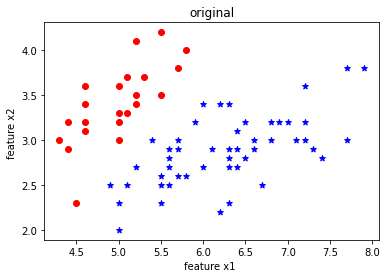

BESVM Accuracy (on training) = with x1 bounded error (20%*0.339),x2 with error (30%*0.661) : 0.9330985915492958
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.339),x2 with error (30%*0.661) : 0.9436619718309859


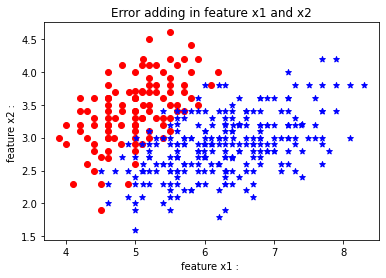

In [212]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 ')
plt.ylabel('feature x2 ')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error (20%*0.339),x2 with error (30%*0.661) : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error (20%*0.339),x2 with error (30%*0.661) : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : ')
plt.ylabel('feature x2 : ')
plt.show()
